# Introducción a PCA

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
datos = {"ingreso" : [9136.81, 11709.94, 12416.79, 4875.73, 10065.03,
                      11755.33, 7401.78, 10291.38, 12002.42, 11787.76,
                      13347.65, 7676.76, 9808.56, 11556.47, 7875.49,
                      12486.19, 9242.40, 6867.09, 12946.25, 9167.36],

         "horas_trabajadas" : [40.38, 41.55, 41.91, 40.18, 41.69,
                               42.32, 41.57, 41.26, 42.01, 41.46,
                               41.71, 41.36, 40.82, 41.22, 41.11,
                               41.07, 41.20, 40.61, 41.52, 41.26]}
df = pd.DataFrame(datos)

In [47]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=['ingreso','horas_trabajadas'])

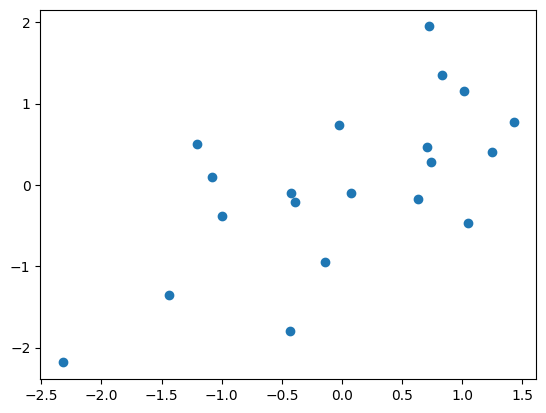

In [48]:
plt.scatter(df['ingreso'], df['horas_trabajadas'])

In [49]:
df.cov()

,ingreso,horas_trabajadas
ingreso,1.052632,0.682360
horas_trabajadas,0.682360,1.052632


In [50]:
from numpy.linalg import eig

In [51]:
valores, vectores = eig(df.cov())

In [52]:
valores

array([0.37027172, 1.73499143])

In [53]:
vectores

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [58]:
cp1 = vectores [:,0]
cp2 = vectores [:,1]

ValueError: Argument V has a size 2 which does not match 1, the number of arrow positions

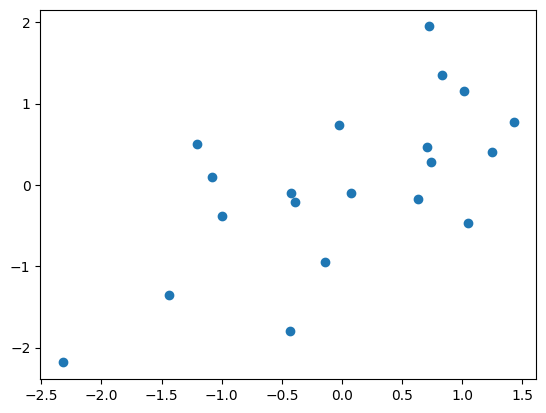

In [60]:
plt.scatter(df['ingreso'],df['horas_trabajadas'])
plt.quiver(0,0,cp1[0]/abs(cp1[0])*valores[0],cp1[1]/abs(cp1[1])*valores*[0])

plt.show()

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [88]:
datos = pd.read_csv('advertising.csv')
datos.head()

modelo = Pipeline ([
    ('scaler',StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('regresion',LinearRegression())
])

X = datos[['TV','Radio','Newspaper']]
y = datos['Sales']

modelo.fit(X,y)
pca = modelo.named_steps['pca']
pca.components_

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267]])

In [89]:
explained_variance = pd.DataFrame(pca.explained_variance_ratio_)

In [90]:
explained_variance

,0
0,0.456951
1,0.327752


In [91]:
lr = modelo.named_steps['regresion']
lr.coef_

array([2.06992121, 4.32260897])

In [92]:
lr.intercept_

np.float64(15.130500000000001)

In [ ]:
sales_pred = modelo.predict(X)
plt.scatter(datos['Sales'],sales_pred)
plt.plot([sales_pred.min(),sales_pred.max()])

In [93]:
from sklearn.metrics import r2_score

In [94]:
r2 = r2_score(datos['Sales'],sales_pred)
r2

NameError: name 'sales_pred' is not defined